# PMC Test Cases 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *

%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulatePMC.py"
%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateSharedMethods.py"
pathDLL = "C:/Users/nico_/Documents/GitHub/ProjetAnnuel3IBD/projet/MLAlgorithms/ML_Library/x64/Release/ML_Library.dll"
myDll = CDLL(pathDLL)

# Classification

linear Simple


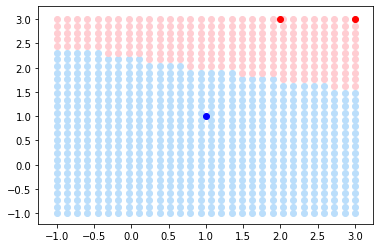

<Figure size 432x288 with 0 Axes>

In [17]:
# Points Data
Xnp = np.array([ [1, 1], [2, 3], [3, 3] ])
Ynp = np.array([ 1, -1, 1 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 1000
display = int(epochs / 10)
pmcStruct = [2, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)
c_double_p = POINTER(c_double)

# Load Matrix X

pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 1] problème ici
myDll.createPMCModel.argtypes = [POINTER(ARRAY(c_int, len(pmcStruct))), c_uint]
myDll.createPMCModel.restype = c_void_p
pArrayWeight = myDll.createPMCModel(arrStruct, len(pmcStruct))
 
#pArrayWeight = createPMCModel(myDll, pmcStruct)

# Fit PMC with classification version
fitPMCClassification( myDll, pArrayWeight, pMatrixX, pMatrixY, 2, alpha, epochs, display)

# Fit PMC with classification version
#myDll.fitPMCClassification.argtypes = [ c_void_p, c_void_p, c_void_p, c_int, c_double, c_int, c_int ]
#myDll.fitPMCClassification.restype = c_double
#error = myDll.fitPMCClassification( pArrayWeight, pMatrixX, pMatrixY, 2, alpha, epochs, display)

# Python Function to get coordinates
def get(i, l):
    return [z[i] for z in l]

X1 = np.linspace(-1, 3, 30)
X2 = np.linspace(-1, 3, 30)
classA = []
classB = []

# Predict points to test if Model is working 
for x1 in X1:
    for x2 in X2: 
        predictX = np.array([x1, x2])
        datasetTmp = datasetToVector(myDll, predictX, 1)
        value = predictPMCClassification(myDll, pArrayWeight, datasetTmp, 1, len(predictX))
        if value[0] > 0:
            classA.append(tuple([x1, x2]))
        else:
            classB.append(tuple([x1, x2]))

# Display points for each class
plt.scatter(
    get(0, classA),
    get(1, classA),
    color="#bbdefb"
)
plt.scatter(
    get(0, classB),
    get(1, classB),
    color="#ffcdd2"
)

# Display data points
plt.scatter(Xnp[0, 0], Xnp[0, 1], color='blue')
plt.scatter(Xnp[1:3,0], Xnp[1:3,1], color='red')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )